In [1]:
#import the Standard libries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [2]:
#load the data using pandas read functions
data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
#Checking the data shape
print(f"The data set contains {data.shape[1]} columns and rows are {data.shape[0]}")

The data set contains 13 columns and rows are 374


In [4]:
# All the columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [6]:
# standardizing the columns 
columns = []
# Convert all elements in the list to lowercase
for column in data.columns:
    column = column.lower().replace(" ", "_")
    columns.append(column)

data.columns = columns

data.set_index("person_id", inplace = True)

In [7]:
data.sample(12)

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
person_id,,,,,,,,,,,,
13,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,None
120,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None
109,Male,37,Engineer,7.8,8,70,4,Normal Weight,120/80,68,7000,None
297,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
63,Male,32,Doctor,6.2,6,30,8,Normal,125/80,72,5000,None
97,Female,36,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None
260,Female,45,Teacher,6.6,7,45,4,Overweight,135/90,65,6000,Insomnia
351,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
110,Male,37,Lawyer,7.4,8,60,5,Normal,130/85,68,8000,None


In [8]:
# creating a new column of systole and dystole, and appending the level of the blood pressure to the blood pressure column
# Split the original blood presssure column and convert the values to integers
data[['systolic_pressure', 'distolic_pressure']] = data['blood_pressure'].str.split('/').apply(lambda x: pd.Series([int(x[0]), int(x[1])]))


In [9]:
# Create a new column for blood pressure level with default values
data['blood_pressure_level'] = ""

# Update the blood pressure level based on conditions
for index, row in data.iterrows():
    if row['systolic_pressure'] < 90 and row['distolic_pressure'] < 60:
        data.at[index, 'blood_pressure_level'] = "Low"
    elif 90 <= row['systolic_pressure'] < 120 and row['distolic_pressure'] < 80:
        data.at[index, 'blood_pressure_level'] = "Ideal"
    elif 120 <= row['systolic_pressure'] <= 129 and row['distolic_pressure'] < 80:
        data.at[index, 'blood_pressure_level'] = "Elevated"
    elif 130 <= row['systolic_pressure'] <= 139 or 80 <= row['distolic_pressure'] <= 89:
        data.at[index, 'blood_pressure_level'] = "Hypertension_1"
    elif row['systolic_pressure'] >= 140 or row['distolic_pressure'] >= 90:
        data.at[index, 'blood_pressure_level'] = "Hypertension_2"
    else:
        data.at[index, 'blood_pressure_level'] = "Hypertensive_Crisis"


In [10]:
data.blood_pressure_level.value_counts()

Hypertension_1    261
Hypertension_2     71
Ideal              41
Elevated            1
Name: blood_pressure_level, dtype: int64

In [11]:
data[data.blood_pressure_level == "Elevated"]

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,systolic_pressure,distolic_pressure,blood_pressure_level
person_id,,,,,,,,,,,,,,,
167,Male,41,Engineer,7.3,8,70,6,Normal Weight,121/79,72,6200,None,121,79,Elevated


In [12]:
data.columns

Index(['gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level', 'bmi_category',
       'blood_pressure', 'heart_rate', 'daily_steps', 'sleep_disorder',
       'systolic_pressure', 'distolic_pressure', 'blood_pressure_level'],
      dtype='object')

In [13]:
columns = ['gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level','systolic_pressure', 'distolic_pressure',
       'blood_pressure_level', 'bmi_category', 'heart_rate', 'daily_steps', 'sleep_disorder', "blood_pressure"]
data = data[columns]

In [14]:
data.drop("blood_pressure", axis = 1, inplace = True)

In [15]:
data.sample(6)

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,systolic_pressure,distolic_pressure,blood_pressure_level,bmi_category,heart_rate,daily_steps,sleep_disorder
person_id,,,,,,,,,,,,,,
80,Male,33,Doctor,6.0,6,30,8,125,80,Hypertension_1,Normal,72,5000,None
160,Male,39,Lawyer,7.2,8,60,5,130,85,Hypertension_1,Normal,68,8000,None
144,Female,38,Accountant,7.1,8,60,4,115,75,Ideal,Normal,68,7000,None
27,Male,30,Doctor,7.8,7,75,6,120,80,Hypertension_1,Normal,70,8000,None
291,Female,50,Nurse,6.0,6,90,8,140,95,Hypertension_2,Overweight,75,10000,Sleep Apnea
252,Female,45,Teacher,6.8,7,30,6,135,90,Hypertension_1,Overweight,65,6000,Insomnia


In [16]:
for column in data.select_dtypes(include=['object']).columns:
    print("************************************************")
    print(f"The Unique values of {column} column are:")
    print(data[column].unique())
    print("==============================================")
    print(f"The value counts for the {column} column is :")
    print(data[column].value_counts())
    print("***********************************************")

************************************************
The Unique values of gender column are:
['Male' 'Female']
The value counts for the gender column is :
Male      189
Female    185
Name: gender, dtype: int64
***********************************************
************************************************
The Unique values of occupation column are:
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
The value counts for the occupation column is :
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: occupation, dtype: int64
***********************************************
************************************************
The Unique values of blood_pressure_le

In [17]:
#Checking the Null values
data.isna().sum()/len(data.shape)*100

gender                     0.0
age                        0.0
occupation                 0.0
sleep_duration             0.0
quality_of_sleep           0.0
physical_activity_level    0.0
stress_level               0.0
systolic_pressure          0.0
distolic_pressure          0.0
blood_pressure_level       0.0
bmi_category               0.0
heart_rate                 0.0
daily_steps                0.0
sleep_disorder             0.0
dtype: float64

In [18]:
# checking for duplicated observations
data.duplicated().sum()

242

In [19]:
duplicates = data[data.duplicated()]

duplicates

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,systolic_pressure,distolic_pressure,blood_pressure_level,bmi_category,heart_rate,daily_steps,sleep_disorder
person_id,,,,,,,,,,,,,,
3,Male,28,Doctor,6.2,6,60,8,125,80,Hypertension_1,Normal,75,10000,None
5,Male,28,Sales Representative,5.9,4,30,8,140,90,Hypertension_2,Obese,85,3000,Sleep Apnea
9,Male,29,Doctor,7.8,7,75,6,120,80,Hypertension_1,Normal,70,8000,None
10,Male,29,Doctor,7.8,7,75,6,120,80,Hypertension_1,Normal,70,8000,None
12,Male,29,Doctor,7.8,7,75,6,120,80,Hypertension_1,Normal,70,8000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,140,95,Hypertension_2,Overweight,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,140,95,Hypertension_2,Overweight,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,140,95,Hypertension_2,Overweight,68,7000,Sleep Apnea


In [20]:
# droping the duplicates data from the whole data
data.drop_duplicates(inplace=True)

In [21]:
# reviewing the result of the duplicates operation above
data.duplicated().sum()

0

In [22]:
# getting a summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 1 to 367
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   132 non-null    object 
 1   age                      132 non-null    int64  
 2   occupation               132 non-null    object 
 3   sleep_duration           132 non-null    float64
 4   quality_of_sleep         132 non-null    int64  
 5   physical_activity_level  132 non-null    int64  
 6   stress_level             132 non-null    int64  
 7   systolic_pressure        132 non-null    int64  
 8   distolic_pressure        132 non-null    int64  
 9   blood_pressure_level     132 non-null    object 
 10  bmi_category             132 non-null    object 
 11  heart_rate               132 non-null    int64  
 12  daily_steps              132 non-null    int64  
 13  sleep_disorder           132 non-null    object 
dtypes: float64(1), int64(8), o

In [23]:
data.describe().style.background_gradient(cmap='nipy_spectral')

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,systolic_pressure,distolic_pressure,heart_rate,daily_steps
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,41.128788,7.082576,7.151515,58.393939,5.537879,128.363636,84.537879,71.204545,6637.878788
std,8.813942,0.775335,1.269037,20.468840,1.740428,7.825650,6.049926,4.867306,1766.288657
min,27.000000,5.800000,4.000000,30.000000,3.000000,115.000000,75.000000,65.000000,3000.000000
25%,33.750000,6.400000,6.000000,44.250000,4.000000,120.750000,80.000000,68.000000,5000.000000
50%,41.000000,7.150000,7.000000,60.000000,6.000000,130.000000,85.000000,70.000000,7000.000000
75%,49.000000,7.725000,8.000000,75.000000,7.000000,135.000000,88.500000,74.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,142.000000,95.000000,86.000000,10000.000000


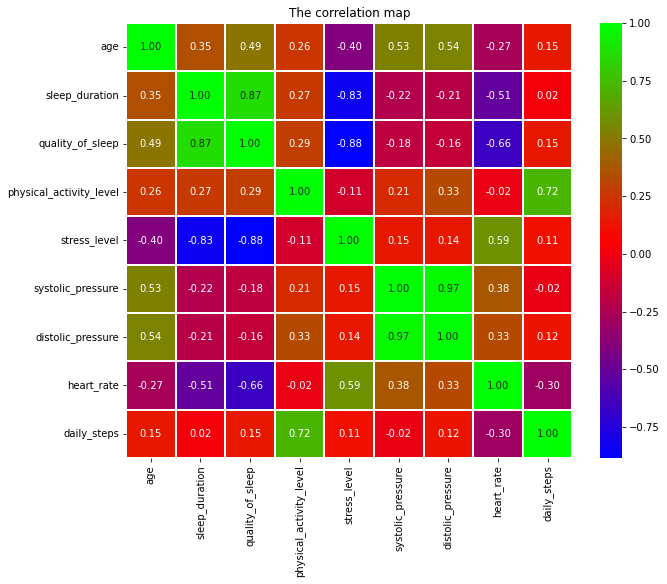

In [24]:
#Visualize the Correlation map
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='brg',annot=True,fmt='.2f',linewidths=1)
plt.title("The correlation map")
plt.show()

It's noteworthy that based on the correlation heatmap shown above, there is a strong positive correlation between sleep quality and sleep duration. This suggests that longer sleep hours tend to result in better sleep quality. Moreover, a strong positive correlation is observed between systolic and diastolic pressure, and a moderate correlation is observed between physical activity level and the number of daily steps, stress level and heart rate, and age and both systolic and diastolic pressure.

Conversely, there is a strong negative correlation between both sleep duration and sleep quality, and a moderate negative correlation between sleep quality and heart rate.

# Explore Data Analysis

### Questions Asked for data:
- Sleep Disorder Percentage:
- Gender Percentage in the Data using a pie chart:
- Distribution of Age using a histogram
- Determine the highest occupation in the dataset.
- Analyze the distribution of sleep duration based on gender.
- Visualize the average sleep duration across different occupations using a bar chart.
- Explore the relationship between average sleep duration and BMI category.
- Identify the dominant occupation within the male category.
- Find the Average Heart with Bmi category

In [25]:
data['sleep_disorder'].value_counts()

None           73
Sleep Apnea    30
Insomnia       29
Name: sleep_disorder, dtype: int64

<AxesSubplot:title={'center':'Sleep Disorder percentage in the data'}, ylabel='sleep_disorder'>

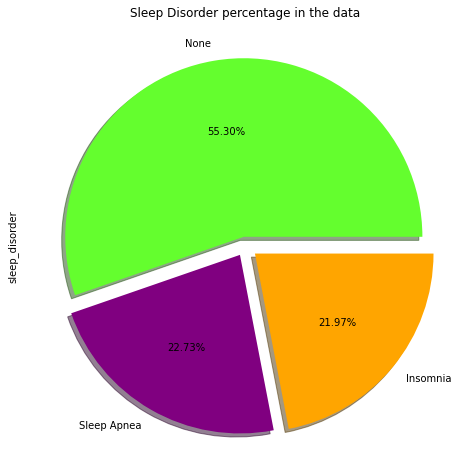

In [26]:
# Find the Sleep disorder percentage
plt.figure(figsize=(8,9))
data['sleep_disorder'].value_counts(normalize=True).sort_values(ascending=False)\
.plot(kind='pie',title="Sleep Disorder percentage in the data",explode=[0.05,0.06,0.07],
    labels=['None','Sleep Apnea','Insomnia'],
    colors=['#64FE2E','purple','orange'],
    autopct='%1.2f%%',
    shadow=True)

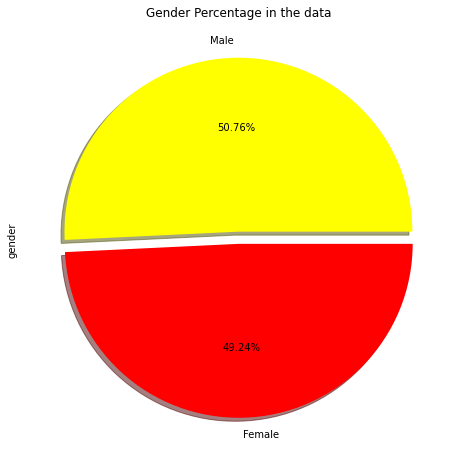

In [27]:
# Find the Gender Percentage using data
plt.figure(figsize = (8,8))
data['gender'].value_counts(normalize=True).sort_values(ascending=False)\
.plot(kind='pie',title="Gender Percentage in the data",explode=[0.05,0.02],
    labels=['Male','Female'],
    colors=['yellow','red'],
    autopct='%1.2f%%',
    shadow=True)
plt.show()

#### Observations:
- From the above two pie charts, we can observe several pieces of information. 
- Firstly, the highest percentage in the sleep disorder pie chart is "None," indicating that a significant portion of the data does not have reported sleep disorders. The second-highest sleep disorder category is "Sleep Apnea."

- In the second pie chart depicting gender percentages, the male percentage is higher compared to the female percentage.

In [ ]:
#Distribution of the age columns
plt.figure(figsize=(10,8))
sns.histplot(data=data,x='age',stat='count',bins=20,kde=True,color='b')
plt.title("Distribution of the Age")
plt.show()

In [ ]:
#Count of the occupation in the data using the bar plot
data['occupation'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title="Visualize the Occupation",figsize=(10,8),color=['#0B0B61','#00FFBF','#2EFE64','#FAAC58','#CEE3F6','#F7F8E0'])
plt.xlabel('Occupation')
plt.ylabel('Count of Values')
plt.show()

### Observations:
Based on the two visual representations provided above, which include a histogram and a bar chart, we can discern the following trends:

- Within the age histogram, it is evident that the age 43 recurs prominently, indicating a substantial presence of individuals within this particular age bracket in the dataset.

- Examining the bar chart, we can ascertain that, according to the dataset, the occupation "Nurse" stands out as the most prevalent, while "Manager" appears to be the least common occupation in terms of demand.

In [ ]:
#Visualize the Sleep Duration with Gender wise
plt.figure(figsize=(10,8))
sns.histplot(data=data,x='sleep_duration',bins=30,kde=True,hue='gender')
plt.title("Visualize the Sleep Duration with Gender wise")
plt.xlabel("Sleep Duriation")
plt.ylabel("Count")
plt.show()

In [ ]:
#Find the Average Sleep time of the Different Occupations
data.groupby('occupation')['quality_of_sleep'].mean().sort_values(ascending=False)\
.plot(kind='bar',title="Average Sleep time of differnet Occupation",figsize=(10, 8),color=['#E1F5A9','#0B4C5F','#9F81F7','#01DFA5','#82FA58'])
plt.xlabel("Occupation")
plt.ylabel("Average Sleep time ")
plt.show()

### Observations:
By examining the pair of charts provided, we can conduct an analysis of the mean sleep duration with respect to gender and the sleep quality relative to various occupations.

As depicted in the histogram chart, the mean sleep duration for males is approximately 7.7 hours, whereas for females, it stands at approximately 8.5 hours.

The bar chart conveys a clear message: among the diverse roles, the profession of "Engineer" boasts the highest sleep quality, while the occupation of "Sales Representative" registers the lowest sleep quality.

In [ ]:
#Some intresting questions asked in the data
#Gender imbalance
imbalanced_data=data['gender'].value_counts()[0]/data['gender'].value_counts()[1]
print('\nGender Imbalance',imbalanced_data)
#find the which is the dominate_occupation in the data
dominate_occupation=data['occupation'].value_counts().idxmax()
print("\nDominate_occupation",dominate_occupation)
#find the least demanding job
least_demanding_job=data['occupation'].value_counts().idxmin()
print("\nThe Least demanding_job",least_demanding_job)
# find the top 5 strees level 
top_5_stress_level=data['stress_level'].value_counts().nlargest(5)
print("\nCommon stress pattern",top_5_stress_level)
#find the age range in the data
age_range=(data['age'].min(),data['age'].max())
print("\nAge Range",age_range)
# find the daily steps in the data 
daily_steps=(data['daily_steps'].min(),data['daily_steps'].max())
print("\nRange of the Daily_steps",daily_steps)
# find the skewss of the sleep durations
sleep_quality_skewness=data['sleep_duration'].value_counts().skew()
print("\nSleep Quality Skewness:", sleep_quality_skewness)

In [ ]:
#Visualize the Physical Activity with Heart Rate on Gender
plt.figure(figsize=(12,10))
sns.scatterplot(data=data,x='physical_activity_level',y='heart_rate',hue='gender')
plt.title("Relationship between Physical Activity and Heart Rate")
plt.show()

In [ ]:
# Find the Relationship between Heart Rate with Daily steps on gender
plt.figure(figsize=(12,10))
sns.scatterplot(data=data,x='heart_rate',y='daily_steps',hue='gender')
plt.title("Relationship with Heart Rate and Daily steps on Gender")
plt.show()

In [ ]:
#Find the average Stress level the BMI Category wise
data.groupby('bmi_category')['stress_level'].mean().sort_values(ascending=False)\
.plot(kind='bar',title='Average Strees level for the BMI Category',figsize=(10, 8),color=['#2E64FE','#58FAD0','#58FA82','#58D3F7'])
plt.xlabel("BMI Category")
plt.ylabel("Average Stress level")
plt.show()

In [ ]:
#Find the averages daily steps with BMI Category on Gender using pivot_table
pd.pivot_table(data=data,index='gender',values='daily_steps',columns='bmi_category',aggfunc='mean').style.background_gradient(cmap='gist_heat')

In [ ]:
#Find the averages daily steps with Blood Pressure Level on Gender using pivot_table
pd.pivot_table(data=data,index='gender',values='daily_steps',columns='blood_pressure_level',aggfunc='mean').style.background_gradient(cmap='gist_heat')

In [ ]:
#Find the which is most demand occupation in male category
data.loc[data['gender']=='Male']['occupation'].value_counts(normalize=True)\
.plot(kind='bar',title="Visualize the Males Occupation", figsize = (10,8),  color=['#58FA58','#A9F5E1','#0A2A12','#F3E2A9'])
plt.xlabel('Occupation')
plt.ylabel("Count of values")
plt.show()

### Observations:
- In the chart provided above, a compelling pattern emerges: individuals classified as overweight tend to exhibit elevated stress levels, whereas those with a normal weight tend to experience lower stress levels.

- As for the prevalence of job roles among males, it becomes apparent that the profession of "Doctor" stands out as the most prevalent occupation, while the role of "Accountant" exhibits comparatively lower prevalence.

In [ ]:
# Create a histogram for distributing the averages Daily steps
plt.figure(figsize=(10,8))
sns.histplot(data['daily_steps'],bins='auto',kde=True)
plt.title("Distribution of the Daily steps")
plt.show()

In [ ]:
#Create a boxplot for occupation and quality of sleep on gender
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='occupation',y='quality_of_sleep',hue='gender',)
plt.xlabel("Occupation")
plt.ylabel("Quality of Sleep")
plt.xticks(rotation=60)
plt.show()

In [ ]:
#Visualize the boxplot with heart rate with age on gender
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x='heart_rate',y='age',hue='gender')
plt.xlabel("Heart Rate")
plt.ylabel("Age")
plt.show()

In [ ]:
#Crete a bar chart with blood Pressure
plt.figure(figsize = (10,8))
data['blood_pressure_level'].value_counts(normalize=True).sort_values(ascending=False)\
.plot(kind='bar',title="visualize the Blood Pressure",color=['#0A122A','#A9F5BC','#2A1B0A'])
plt.xlabel("Blood Pressure")
plt.ylabel("Count of value")
plt.show()

In [ ]:
#Find the Average heart rate with Bmi category wise
plt.figure(figsize = (10,8))
data.groupby('bmi_category')['heart_rate'].mean().sort_values(ascending=False)\
.plot(kind='bar',title='Average Heart Rate with BMI Category wise',color=['#81F79F','#8181F7','#CEF6CE'])
plt.xlabel("BMI Category")
plt.ylabel("Average Heart Rate")
plt.show()

In [ ]:
#Find the Average sleep duration with occupation with BMI Category on sleep Duration
data.groupby(['occupation','bmi_category'])['sleep_duration'].mean().sort_values(ascending=False)\
.unstack()\
.style.background_gradient(cmap='gist_heat')

In [ ]:
#Create a countplot for occupation on the gender
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='occupation',hue='gender')
plt.title("Count of the Occupation on Gender")
plt.xlabel("Occupation")
plt.ylabel("Count of values")
plt.show()

## Multicolinearity Analysis

In [ ]:
df = data.copy()
unclean_df = data.copy()

In [ ]:
# importing libraries for assesing the degree of multicolinearity amongst the variable
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# function for tabulating the score of multicolinearity of aeach column in descending order
def calc_vif(x):
    vif=pd.DataFrame()
    vif['column']=x.columns
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    # Sort the DataFrame by 'vif' column in descending order
    vif = vif.sort_values(by='vif', ascending=False)
    return vif

# function to iterate the drop in the columns with the highest variance enflation factor score 
# iterates the conditional loop untill the highest vif score is less or equal to 5 and outputs the resulting data

def drop_high_vif_columns(df, threshold=5):
    while True:
        vif_result = calc_vif(df)
        highest_vif_column = vif_result.iloc[0]['column']
        highest_vif_value = vif_result.iloc[0]['vif']
        
        if highest_vif_value > threshold:
            print(f"Dropping column '{highest_vif_column}' with VIF {highest_vif_value:.2f}")
            df = df.drop(columns=highest_vif_column)
        else:
            print("VIF condition satisfied. Stopping the process.")
            break

    return df

In [ ]:
clean_df = drop_high_vif_columns(unclean_df)

calc_vif(clean_df)

# Machine Learning Modeling  

In [ ]:
!pip install xgboost

In [ ]:
!pip install catboost

In [ ]:
import xgboost as xgb
import catboost as cb

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Covert the Categorical Columns to into numerical values
for col in data.select_dtypes(include='object'):
    label_encoder=LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])

In [ ]:
data.sample(10)

#### TrainIng, Testing and Splitting

In [ ]:
# Divided into the data into dependent and independent variables
X=data.drop(['sleep_disorder'],axis=1)
y=data['sleep_disorder']
#Scaling the values
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.fit_transform(X)

In [ ]:
def evaluate_classification_models(X, y):
    # Split the data into training and testing sets
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)
    
    # importing the libraries and models for class balancing
    from imblearn.combine import SMOTETomek
    # Instantiate SMOTETomek
    smote_tomek = SMOTETomek(random_state=42)

    # Apply SMOTETomek to the training data
    X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

    # Initialize and fit the models
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": XGBClassifier(),
        "CatBoost": CatBoostClassifier(verbose=0),
        "KNN": KNeighborsClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Gradient Boosting": GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)

        print(f"Model: {model_name}\n")

        # Accuracy Score
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy Score: {accuracy:.2f}\n")

        # Classification Report
        report = classification_report(y_test, y_pred)
        print("Classification Report:\n", report)

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:\n", cm)

        print("=" * 40)

In [ ]:
if __name__ == "__main__":
    # Replace X and y with your dataset and target variable
    X = np.random.rand(100, 5)  # Example data
    y = np.random.randint(2, size=100)  # Example target variable (binary classification)

    evaluate_classification_models(X, y)

### Feature Importance and Plot

In [ ]:
X_trained = pd.DataFrame(X_train)

In [ ]:
data.drop()

In [ ]:
X_trained.columns = data.columns

In [ ]:
# Assuming X_train was originally a DataFrame
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": model.feature_importances_
})

fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.sample(n=5)  # Specify the number of samples you want to display

plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x="Importance", y="Feature Name")
plt.title("Feature Importance Each Attributes (Model Name)", fontsize=18)
plt.xlabel("Importance", fontsize=16)  # Use xlabel instead of title to label the x-axis
plt.ylabel("Feature Name", fontsize=16)
plt.show()


## Conclusion:
This is another project in data science where data is obtained from Kaggle. The usual data preprocessing steps are performed, including data cleaning. Exploratory data analysis (EDA) techniques are applied to gain insights from the data, and questions are formulated based on the analysis. Visualizations such as bar charts, pie charts, and other types of charts are created to present the findings. Machine learning algorithms, specifically GradientBoostingClassifier and XGBClassifier, are applied to the data, and they achieve high accuracy scores.